In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
h = cast

In [7]:
sm = h[ (h.title.str.contains('Superman') | (h.title=='Man of Steel')) & (h.title!='Batman v Superman: Dawn of Justice')].year.value_counts()
#t.head().stack(0)

In [8]:
bm = h[ h.title.str.contains('Batman') & (h.title!='Batman v Superman: Dawn of Justice')].sort_values(['title','year']).set_index(['title']).year.value_counts().sort_values(0)
bm

1964      1
1965      2
1973      5
2016      7
1967      8
2017      9
2014     11
1991     12
2010     22
1993     24
2012     30
1949     40
1943     52
1992     65
1989     67
1966     84
1995     87
1997     97
2005    141
Name: year, dtype: int64

In [9]:
smbm = h[((h.title.str.contains('Superman') | (h.title=='Man of Steel')) | h.title.str.contains('Batman') )& (h.title!='Batman v Superman: Dawn of Justice')].sort_values(['title','year'])
smbm.head() #every year, we have titles that are Superman and Batman movies (no joint)
#smbm[( smbm.title.str.contains('Superman') | (smbm.title=='Man of Steel') )]
#smbm[smbm.title.str.contains('Batman')]


,title,year,name,type,character,n
25564,"Abar, the First Black Superman",1977,Joe Alberti,actor,Hunt,10
57064,"Abar, the First Black Superman",1977,Manuel Angeli,actor,Councilman,27
323360,"Abar, the First Black Superman",1977,William Carrol Jr.,actor,Marco,13
432599,"Abar, the First Black Superman",1977,Richard (III) Corrigan,actor,Councilman,15
452349,"Abar, the First Black Superman",1977,Edward Cross,actor,Mayor's Aide,19


In [11]:

df = smbm
df['movie_type'] = 'Superman'
df = df.set_index('movie_type',drop=True, append=True)
df = df.reset_index()
df.loc[df.title.str.contains('Batman'),['movie_type'] ]= 'Batman'
#df.loc[df.cherry == 'bad', ['apple', 'banana']] = np.nan

In [28]:
comsb = df.sort_values(['year','movie_type']).groupby(['year','movie_type']).size().unstack('movie_type').fillna(0)

In [41]:
comsb[comsb['Superman']>comsb['Batman']] 

movie_type,Batman,Superman
year,,
1948,0,63
1950,0,44
1951,0,28
1954,0,130
1960,0,13
1968,0,14
1973,5,41
1977,0,29
1978,0,104


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [42]:
comsb[comsb['Batman']>comsb['Superman']] 

movie_type,Batman,Superman
year,,
1943,52,0
1949,40,0
1964,1,0
1965,2,0
1966,84,0
1989,67,0
1991,12,0
1992,65,0
1993,24,0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [44]:
h = cast

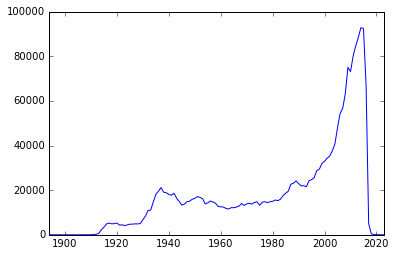

In [52]:
h[h.type=='actor'].year.value_counts().sort_index().plot()

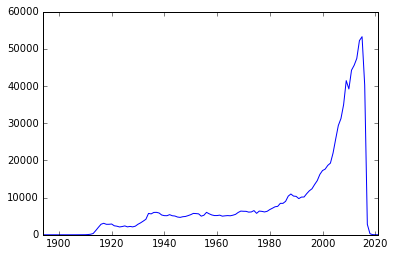

In [53]:
h[h.type=='actress'].year.value_counts().sort_index().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

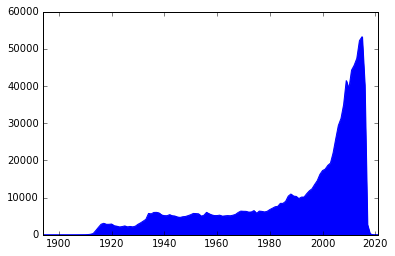

In [59]:
h[h.type=='actress'].year.value_counts().sort_index().plot(kind='area')

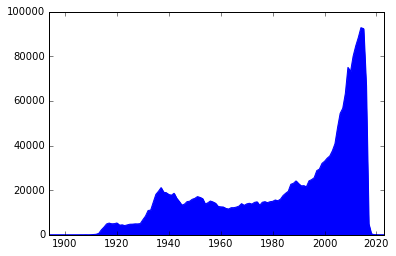

In [60]:
h[h.type=='actor'].year.value_counts().sort_index().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

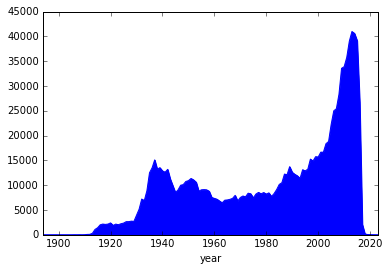

In [118]:
t = h.groupby(['year','type']).size()
t=t.unstack('type').fillna(0)
(t['actor']-t['actress']).plot(kind='area')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

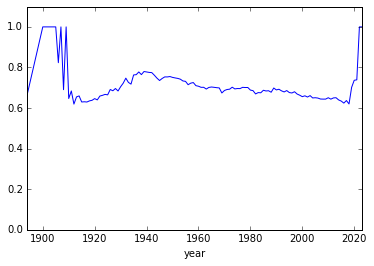

In [134]:
t = h.groupby(['year','type']).size()
t=t.unstack('type').fillna(0)
(t.actor/(t.actor+t.actress)).plot(ylim=[0,1.1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [135]:
h.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


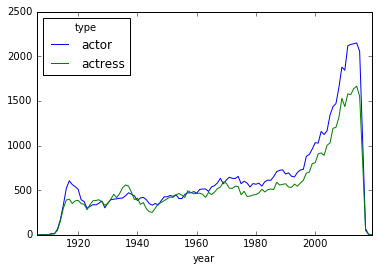

In [150]:
t = h[(h.n==2)] # all the supporting roles
t = t.groupby(['year','type']).size() # get a table for each year and the count of each type
t = t.unstack('type').fillna(0)
t.plot()

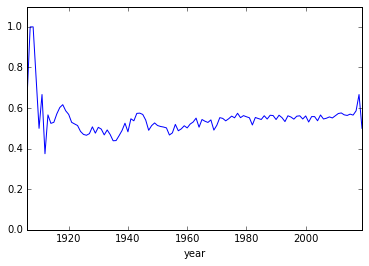

In [152]:
(t.actor/(t.actor+t.actress)).plot(ylim=[0,1.1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

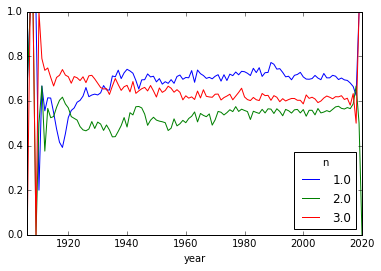

In [196]:
t = h[(h.n>=1) & (h.n<=3)] # all the rank roles 1 - 3
t = t.groupby(['year','type','n']).size()
g = t.unstack(['type']).fillna(0)
g = g.unstack('n').fillna(0)
f = (g.actor/(g.actor+g.actress)).fillna(0)
f.plot()